In [1]:
# notebooks/example_notebook.ipynb

import sys
import os
sys.path.append(os.path.abspath('../scripts'))
sys.path.append(os.path.abspath('../DB_Connection'))
sys.path.append(os.path.abspath('../src'))

In [2]:
from db import load_data_from_postgres,load_data_using_sqlalchemy
from utils import missing_values_table,convert_bytes_to_megabytes,remove_all_columns_outliers


In [3]:
# Define your SQL query
query = "SELECT * FROM xdr_data;"  # Replace with your actual table name

# Load data from PostgreSQL
df = load_data_from_postgres(query)

# Display the first few rows of the dataframe
if df is not None:
    print("Successfully loaded the data")
else:
    print("Failed to load data.")


d:\Kifya\Week_02\DB_Connection\db.py:33: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


Successfully loaded the data


In [4]:
df.head(2)

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0


In [5]:
data=df.copy()

In [6]:
# Check for missing values
data.isnull().sum()

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

In [7]:
# # Define your SQL query
# query = "SELECT * FROM xdr_data;"  # Replace with your actual table name

# # Load data from PostgreSQL using SQLAlchemy
# df = load_data_using_sqlalchemy(query)

# # Display the first few rows of the dataframe
# if df is not None:
#     print("Successfully loaded the data")
# else:
#     print("Failed to load data.")

In [8]:
data.shape

(150001, 55)

In [9]:
# Summary statistics for numerical columns
data.describe()

,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,1.490100e+05,150000.000000,150000.000000,1.500000e+05,1.494310e+05,1.489350e+05,1.494290e+05,122172.000000,122189.000000,150000.000000,...,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500000e+05,1.500000e+05
mean,1.013887e+19,499.188200,498.800880,1.046086e+05,2.082016e+14,4.188282e+10,4.847455e+13,109.795706,17.662883,13300.045927,...,1.163407e+07,1.100941e+07,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,4.112121e+07,4.546434e+08
std,2.893173e+18,288.611834,288.097653,8.103762e+04,2.148809e+10,2.447443e+12,2.241637e+13,619.782739,84.793524,23971.878541,...,6.710569e+06,6.345423e+06,6.725218e+06,6.359490e+06,2.439675e+08,4.782700e+06,2.432050e+08,4.769004e+06,1.127639e+07,2.441429e+08
min,6.917538e+18,0.000000,0.000000,7.142000e+03,2.040471e+14,3.360100e+10,4.400152e+11,0.000000,0.000000,0.000000,...,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,7.114041e+06
25%,7.349883e+18,250.000000,251.000000,5.744050e+04,2.082014e+14,3.365130e+10,3.546071e+13,32.000000,2.000000,43.000000,...,5.833501e+06,5.517965e+06,5.777156e+06,5.475981e+06,2.104733e+08,4.128476e+06,2.101869e+08,4.145943e+06,3.322201e+07,2.431068e+08
50%,7.349883e+18,499.000000,500.000000,8.639900e+04,2.082015e+14,3.366371e+10,3.572201e+13,45.000000,5.000000,63.000000,...,1.161602e+07,1.101345e+07,1.164222e+07,1.099638e+07,4.234081e+08,8.291208e+06,4.218030e+08,8.267071e+06,4.114331e+07,4.558411e+08
75%,1.304243e+19,749.000000,750.000000,1.324302e+05,2.082018e+14,3.368349e+10,8.611970e+13,70.000000,15.000000,19710.750000,...,1.744852e+07,1.651556e+07,1.747048e+07,1.650727e+07,6.331742e+08,1.243162e+07,6.316918e+08,1.238415e+07,4.903424e+07,6.657055e+08
max,1.318654e+19,999.000000,999.000000,1.859336e+06,2.140743e+14,8.823971e+14,9.900120e+13,96923.000000,7120.000000,378160.000000,...,2.325910e+07,2.201196e+07,2.325919e+07,2.201196e+07,8.434419e+08,1.655879e+07,8.434425e+08,1.655882e+07,7.833131e+07,9.029696e+08


In [10]:
missing_values_df = missing_values_table(data)
print("Missing Values in df:")
print(missing_values_df)

Your selected dataframe has 55 columns.
There are 41 columns that have missing values.
Missing Values in df:
                                          Missing Values  % of Total Values  \
Nb of sec with 37500B < Vol UL                    130254               86.8   
Nb of sec with 6250B < Vol UL < 37500B            111843               74.6   
Nb of sec with 125000B < Vol DL                    97538               65.0   
TCP UL Retrans. Vol (Bytes)                        96649               64.4   
Nb of sec with 31250B < Vol DL < 125000B           93586               62.4   
Nb of sec with 1250B < Vol UL < 6250B              92894               61.9   
Nb of sec with 6250B < Vol DL < 31250B             88317               58.9   
TCP DL Retrans. Vol (Bytes)                        88146               58.8   
HTTP UL (Bytes)                                    81810               54.5   
HTTP DL (Bytes)                                    81474               54.3   
Avg RTT DL (ms)       

In [11]:
# df['x'] = convert_bytes_to_megabytes(df, 'HTTP DL (Bytes)')

# print(df)

In [12]:
# remove unnecessary column
columns_to_drop = ['Bearer Id', 'IMSI', 'IMEI', 'Last Location Name']
droped_data = data.drop(columns=columns_to_drop, errors='ignore')
droped_data.head(2)


,Start,Start ms,End,End ms,Dur. (ms),MSISDN/Number,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,3.366496e+10,42.0,5.0,23.0,44.0,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,3.368185e+10,65.0,5.0,16.0,26.0,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0


In [13]:
# Assuming 'data_cleaned' is the DataFrame containing the data
import pandas as pd
# Convert 'Start' and 'End' columns to datetime format
droped_data['Start'] = pd.to_datetime(droped_data['Start'], errors='coerce')
droped_data['End'] = pd.to_datetime(droped_data['End'], errors='coerce')

# Check for any missing values introduced due to invalid date formats
# missing_dates = droped_data[['Start', 'End']].isnull().sum()


In [14]:
droped_data.head(1)

,Start,Start ms,End,End ms,Dur. (ms),MSISDN/Number,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,2019-04-04 12:01:00,770.0,2019-04-25 14:35:00,662.0,1823652.0,3.366496e+10,42.0,5.0,23.0,44.0,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0


In [15]:
print(droped_data.dtypes)

Start                                       datetime64[ns]
Start ms                                           float64
End                                         datetime64[ns]
End ms                                             float64
Dur. (ms)                                          float64
MSISDN/Number                                      float64
Avg RTT DL (ms)                                    float64
Avg RTT UL (ms)                                    float64
Avg Bearer TP DL (kbps)                            float64
Avg Bearer TP UL (kbps)                            float64
TCP DL Retrans. Vol (Bytes)                        float64
TCP UL Retrans. Vol (Bytes)                        float64
DL TP < 50 Kbps (%)                                float64
50 Kbps < DL TP < 250 Kbps (%)                     float64
250 Kbps < DL TP < 1 Mbps (%)                      float64
DL TP > 1 Mbps (%)                                 float64
UL TP < 10 Kbps (%)                                float

In [16]:
# fill numeric missing value with mean
numeric_cols = droped_data.select_dtypes(include='number').columns
data_filled_numeric = droped_data[numeric_cols].fillna(droped_data[numeric_cols].mean())


In [17]:
# Fill non-numeric columns with a placeholder or mode
non_numeric_cols = droped_data.select_dtypes(exclude='number').columns

data_filled_non_numeric = droped_data[non_numeric_cols].fillna('Unknown')

In [18]:
# Merge both numeric and non-numeric
data_filled = pd.concat([data_filled_numeric, data_filled_non_numeric], axis=1)

In [19]:
# check missing value after hadle it
print(data_filled.isnull().sum())

Start ms                                    0
End ms                                      0
Dur. (ms)                                   0
MSISDN/Number                               0
Avg RTT DL (ms)                             0
Avg RTT UL (ms)                             0
Avg Bearer TP DL (kbps)                     0
Avg Bearer TP UL (kbps)                     0
TCP DL Retrans. Vol (Bytes)                 0
TCP UL Retrans. Vol (Bytes)                 0
DL TP < 50 Kbps (%)                         0
50 Kbps < DL TP < 250 Kbps (%)              0
250 Kbps < DL TP < 1 Mbps (%)               0
DL TP > 1 Mbps (%)                          0
UL TP < 10 Kbps (%)                         0
10 Kbps < UL TP < 50 Kbps (%)               0
50 Kbps < UL TP < 300 Kbps (%)              0
UL TP > 300 Kbps (%)                        0
HTTP DL (Bytes)                             0
HTTP UL (Bytes)                             0
Activity Duration DL (ms)                   0
Activity Duration UL (ms)         

### Detectiong and Handling Outlier

In [23]:
data_iqr_cleaned = remove_all_columns_outliers(data_filled, method="iqr")


In [24]:
data_cleaned_zscore = remove_all_columns_outliers(data_filled, method="zscore")
# Check the shape of the cleaned data
print(f"Original data shape: {data_filled.shape}")
print(f"Cleaned data shape (IQR method): {data_iqr_cleaned.shape}")
print(f"Cleaned data shape (Z-score method): {data_cleaned_zscore.shape}")

Original data shape: (150001, 51)
Cleaned data shape (IQR method): (55613, 51)
Cleaned data shape (Z-score method): (127926, 51)


##### Take Z-score method to preserve most data

In [25]:
data_cleaned_zscore.describe()

,Start ms,End ms,Dur. (ms),MSISDN/Number,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,127926.000000,127926.000000,127926.000000,1.279260e+05,127926.000000,127926.000000,127926.000000,127926.000000,1.279260e+05,1.279260e+05,...,1.279260e+05,1.279260e+05,1.279260e+05,1.279260e+05,1.279260e+05,1.279260e+05,1.279260e+05,1.279260e+05,1.279260e+05,1.279260e+05
mean,499.029597,498.560791,101931.350207,3.373142e+10,83.103985,12.116785,8313.977472,828.704801,1.485834e+07,5.799436e+05,...,1.162390e+07,1.100610e+07,1.161887e+07,1.099245e+07,4.220298e+08,8.289359e+06,4.206732e+08,8.261201e+06,4.110617e+07,4.546205e+08
std,288.508615,288.306183,62560.738204,6.876142e+08,123.014803,17.321402,16415.216985,2075.324728,1.057570e+07,4.874017e+05,...,6.706121e+06,6.340976e+06,6.725424e+06,6.361581e+06,2.440002e+08,4.783647e+06,2.433820e+08,4.764825e+06,1.125969e+07,2.441853e+08
min,0.000000,0.000000,7142.000000,3.360100e+10,0.000000,0.000000,0.000000,0.000000,6.000000e+00,1.000000e+00,...,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,1.130000e+02,3.290000e+03,1.480000e+02,7.377304e+06,7.114041e+06
25%,250.000000,250.000000,56799.250000,3.365078e+10,34.000000,3.000000,41.000000,46.000000,1.741830e+06,1.718235e+05,...,5.827651e+06,5.529062e+06,5.774451e+06,5.458225e+06,2.104924e+08,4.130289e+06,2.093706e+08,4.151640e+06,3.319736e+07,2.429948e+08
50%,499.000000,500.000000,86400.000000,3.366361e+10,51.000000,6.000000,57.000000,54.000000,2.080991e+07,7.596587e+05,...,1.158922e+07,1.100606e+07,1.163203e+07,1.098654e+07,4.233894e+08,8.297517e+06,4.213359e+08,8.258302e+06,4.114690e+07,4.559562e+08
75%,749.000000,750.000000,137168.500000,3.368382e+10,109.795706,17.662883,7780.000000,564.000000,2.080991e+07,7.596587e+05,...,1.743947e+07,1.650872e+07,1.746003e+07,1.650395e+07,6.335776e+08,1.244058e+07,6.314164e+08,1.237106e+07,4.901873e+07,6.660426e+08
max,999.000000,999.000000,347695.000000,4.188282e+10,1787.000000,246.000000,85214.000000,15639.000000,3.391790e+08,4.629760e+07,...,2.325910e+07,2.201196e+07,2.325886e+07,2.201196e+07,8.434260e+08,1.655879e+07,8.434425e+08,1.655882e+07,7.483343e+07,9.029696e+08


In [26]:
cleaned_data=data_cleaned_zscore.copy()

In [33]:
# Identify the top 10 handsets used by customers
top_10_handsets = data['Handset Type'].value_counts().head(10)

# Display the top 10 handsets
print(top_10_handsets)


Handset Type
Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: count, dtype: int64


In [32]:
# Identify the top 3 handset manufacturers
top_3_manufacturers = data['Handset Manufacturer'].value_counts().head(3)

# Display the top 3 handset manufacturers
print(top_3_manufacturers)


Handset Manufacturer
Apple      59565
Samsung    40839
Huawei     34423
Name: count, dtype: int64


In [34]:
# Step 1: Identify the top 3 handset manufacturers
top_3_manufacturers = data['Handset Manufacturer'].value_counts().head(3).index

# Step 2: For each manufacturer, find the top 5 handsets
top_5_handsets_per_manufacturer = {}

for manufacturer in top_3_manufacturers:
    # Filter the dataset for the current manufacturer
    manufacturer_data = data[data['Handset Manufacturer'] == manufacturer]
    
    # Find the top 5 handsets for this manufacturer
    top_5_handsets = manufacturer_data['Handset Type'].value_counts().head(5)
    
    # Store the results in the dictionary
    top_5_handsets_per_manufacturer[manufacturer] = top_5_handsets

# Display the top 5 handsets for each of the top 3 manufacturers
for manufacturer, handsets in top_5_handsets_per_manufacturer.items():
    print(f"Top 5 handsets for {manufacturer}:")
    print(handsets)
    print("\n")


Top 5 handsets for Apple:
Handset Type
Apple iPhone 6S (A1688)    9419
Apple iPhone 6 (A1586)     9023
Apple iPhone 7 (A1778)     6326
Apple iPhone Se (A1723)    5187
Apple iPhone 8 (A1905)     4993
Name: count, dtype: int64


Top 5 handsets for Samsung:
Handset Type
Samsung Galaxy S8 (Sm-G950F)    4520
Samsung Galaxy A5 Sm-A520F      3724
Samsung Galaxy J5 (Sm-J530)     3696
Samsung Galaxy J3 (Sm-J330)     3484
Samsung Galaxy S7 (Sm-G930X)    3199
Name: count, dtype: int64


Top 5 handsets for Huawei:
Handset Type
Huawei B528S-23A                  19752
Huawei E5180                       2079
Huawei P20 Lite Huawei Nova 3E     2021
Huawei P20                         1480
Huawei Y6 2018                      997
Name: count, dtype: int64




#### Interpretation:
1. **Top Handset Usage**: The top 3 handset manufacturers dominate a significant portion of the user base, indicating strong brand loyalty and customer preference. Each manufacturer has specific models that are more popular, with a clear focus on high-end or mid-range devices.
   
2. **Brand Popularity**: The concentration of users around the top 5 handsets for each of these manufacturers suggests that marketing efforts focused on these specific handsets could yield high returns, as they represent the majority of devices in use.

3. **Data Usage Patterns**: Different handset models may cater to different user segments in terms of data usage, app preferences, and demographics. Understanding the data consumption and usage behavior of users with these top devices could further enhance targeted campaigns.

### Recommendation:
1. **Targeted Campaigns**: Marketing should focus on users of the top 5 handsets for each manufacturer with personalized offers, promotions, or discounts on accessories or services tailored to their device.

2. **Partnerships with Manufacturers**: Collaborate with the top 3 handset manufacturers for co-branded campaigns, exclusive deals, or device-specific promotions, leveraging the popularity of these brands to reach a broader audience.

3. **Data-Driven Advertising**: Use the insights from handset usage to develop data-driven advertising strategies that cater to the unique preferences of users with these devices, focusing on their app usage behavior, browsing habits, and consumption trends.

4. **Customer Retention**: Implement loyalty programs or upgrade offers for users of top handset models, encouraging them to stay within the ecosystem of the brand while upgrading to newer models.

In [38]:
data.head(1)

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0


In [40]:
# Aggregate per user the required information
user_aggregation = data.groupby('MSISDN/Number').agg(
    number_of_xDR_sessions=('Bearer Id', 'nunique'),  # Count unique xDR sessions
    total_session_duration=('Dur. (ms)', 'sum'),       # Sum of session durations
    total_DL_data=('Total DL (Bytes)', 'sum'),        # Sum of total download data
    total_UL_data=('Total UL (Bytes)', 'sum')         # Sum of total upload data
)

# Calculate total data volume (DL + UL) and add as a new column
user_aggregation['total_data_volume'] = user_aggregation['total_DL_data'] + user_aggregation['total_UL_data']

# Display the aggregated data
print(user_aggregation.head())


               number_of_xDR_sessions  total_session_duration  total_DL_data  \
MSISDN/Number                                                                  
3.360100e+10                        1                116720.0   8.426375e+08   
3.360100e+10                        1                181230.0   1.207552e+08   
3.360100e+10                        1                134969.0   5.566597e+08   
3.360101e+10                        1                 49878.0   4.019932e+08   
3.360101e+10                        2                 37104.0   1.363130e+09   

               total_UL_data  total_data_volume  
MSISDN/Number                                    
3.360100e+10      36053108.0       8.786906e+08  
3.360100e+10      36104459.0       1.568596e+08  
3.360100e+10      39306820.0       5.959665e+08  
3.360101e+10      20327526.0       4.223207e+08  
3.360101e+10      94280527.0       1.457411e+09  


In [42]:


# Create a new column for total data volume (DL + UL)
cleaned_data['total_data_volume'] = cleaned_data['Total DL (Bytes)'] + cleaned_data['Total UL (Bytes)']

# Group by user (MSISDN/Number) and calculate total session duration and data volume per user
user_duration_data = cleaned_data.groupby('MSISDN/Number').agg(
    total_session_duration=('Dur. (ms)', 'sum'),     # Sum of session durations per user
    total_data_volume=('total_data_volume', 'sum')  # Sum of total data volume (DL + UL) per user
)

# Segment users into the top five decile classes based on total session duration
user_duration_data['decile_class'] = pd.qcut(user_duration_data['total_session_duration'], 5, labels=False) + 1

# Compute total data volume (DL + UL) per decile class
decile_data = user_duration_data.groupby('decile_class').agg(
    total_data_per_decile=('total_data_volume', 'sum')
)

# Display the result
print(decile_data)


              total_data_per_decile
decile_class                       
1                      1.028384e+13
2                      1.068274e+13
3                      1.073267e+13
4                      1.182774e+13
5                      1.988934e+13


#### Non-Graphical Univariate Analysis

In [44]:
# Calculate range, variance, and standard deviation for quantitative variables
range_duration = cleaned_data['Dur. (ms)'].max() - cleaned_data['Dur. (ms)'].min()
variance_duration = cleaned_data['Dur. (ms)'].var()
std_duration = cleaned_data['Dur. (ms)'].std()

range_duration, variance_duration, std_duration


(np.float64(340553.0),
 np.float64(3913845964.68741),
 np.float64(62560.73820446343))

#### Graphical Univariate Analysis

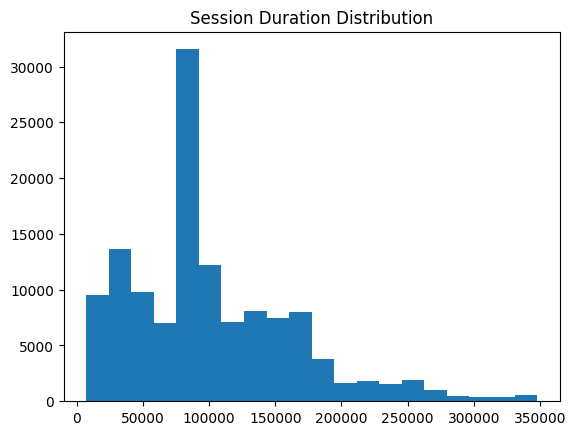

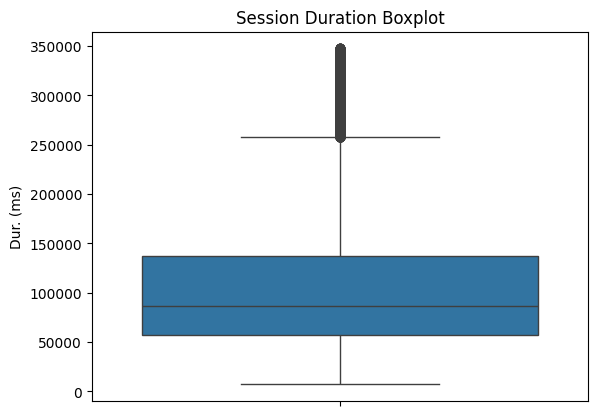

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for session duration
plt.hist(cleaned_data['Dur. (ms)'], bins=20)
plt.title('Session Duration Distribution')
plt.show()

# Boxplot for session duration
sns.boxplot(cleaned_data['Dur. (ms)'])
plt.title('Session Duration Boxplot')
plt.show()


#### Bivariate Analysis

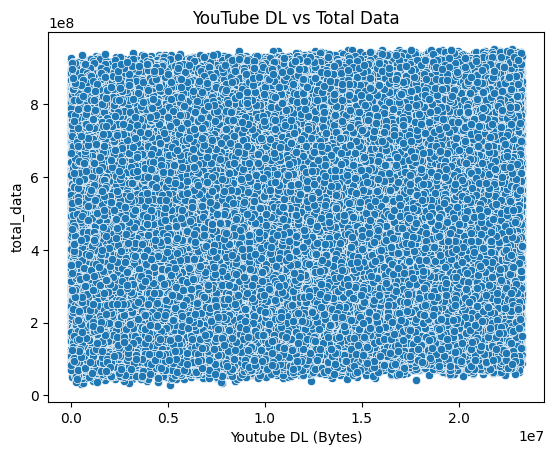

,Youtube DL (Bytes),Netflix DL (Bytes),Gaming DL (Bytes),total_data
Youtube DL (Bytes),1.000000,0.002295,-0.002568,0.024914
Netflix DL (Bytes),0.002295,1.000000,-0.000785,0.026818
Gaming DL (Bytes),-0.002568,-0.000785,1.000000,0.998071
total_data,0.024914,0.026818,0.998071,1.000000


In [47]:
# Scatter plot to examine relationships
sns.scatterplot(x='Youtube DL (Bytes)', y='total_data', data=cleaned_data)
plt.title('YouTube DL vs Total Data')
plt.show()

# Correlation between different app data and total data
cleaned_data[['Youtube DL (Bytes)', 'Netflix DL (Bytes)', 'Gaming DL (Bytes)', 'total_data']].corr()


####  Correlation Analysis

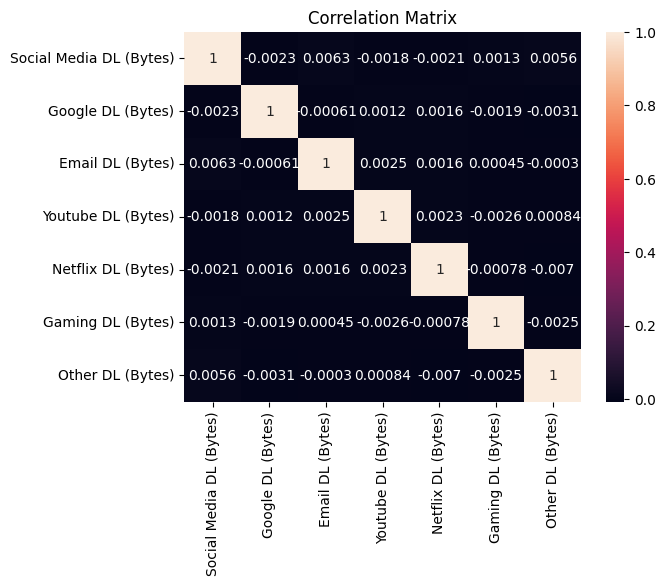

In [48]:
# Correlation matrix for specific application data
correlation_matrix = cleaned_data[['Social Media DL (Bytes)', 'Google DL (Bytes)', 'Email DL (Bytes)', 
                           'Youtube DL (Bytes)', 'Netflix DL (Bytes)', 'Gaming DL (Bytes)', 
                           'Other DL (Bytes)']].corr()

sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()


#### Dimensionality Reduction (PCA)

In [52]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Select relevant columns and scale the data
columns = ['Social Media DL (Bytes)', 'Google DL (Bytes)', 'Email DL (Bytes)', 
           'Youtube DL (Bytes)', 'Netflix DL (Bytes)', 'Gaming DL (Bytes)', 'Other DL (Bytes)']
data_scaled = StandardScaler().fit_transform(cleaned_data[columns])

# Apply PCA
pca = PCA()
pca_result = pca.fit_transform(data_scaled)
# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
# Cumulative explained variance
cumulative_explained_variance = explained_variance_ratio.cumsum()

# PCA results and explained variance
print(pca.explained_variance_ratio_)
print('\n\n')



[0.14460466 0.14364789 0.14343834 0.14264562 0.14240344 0.14186961
 0.14139044]





#### Interpretation of PCA Results
Principal Components Capture Major Variance: The first few principal components often capture a significant portion of the variance in the data, allowing for dimensionality reduction while retaining essential information.

Feature Contributions: Loadings reveal how each original feature contributes to the principal components. High absolute values in loadings indicate that the corresponding feature significantly influences the component.

Data Simplification: By projecting data onto principal components, you simplify the dataset while preserving most of the variability. This helps in reducing computational complexity and improving visualization.

Patterns in Data: PCA can uncover patterns or groupings in the data that are not immediately apparent. For example, features with high loadings on the same component may be related or serve similar roles in the dataset.

## Task 2 - User Engagement Analysis

In [62]:
# Convert 'Start' and 'End' columns to datetime
cleaned_data['Start'] = pd.to_datetime(cleaned_data['Start'], errors='coerce')
cleaned_data['End'] = pd.to_datetime(cleaned_data['End'], errors='coerce')

# Check for any issues with the conversion
print(cleaned_data[['Start', 'End']].head())

                 Start                 End
62 2019-04-21 02:55:00 2019-04-25 00:17:00
65 2019-04-21 08:26:00 2019-04-25 01:20:00
66 2019-04-21 08:54:00 2019-04-25 00:48:00
67 2019-04-21 09:19:00 2019-04-25 04:42:00
68 2019-04-21 10:09:00 2019-04-25 01:39:00


In [64]:
# Count sessions per user
sessions_frequency = cleaned_data.groupby('MSISDN/Number').size().reset_index(name='Session Frequency')

print(sessions_frequency)

       MSISDN/Number  Session Frequency
0       3.360100e+10                  1
1       3.360100e+10                  1
2       3.360100e+10                  1
3       3.360101e+10                  1
4       3.360101e+10                  1
...              ...                ...
96316   3.378997e+10                  1
96317   3.378998e+10                  1
96318   3.379000e+10                  1
96319   3.379000e+10                  1
96320   4.188282e+10                900

[96321 rows x 2 columns]


In [63]:


# Calculate session duration
cleaned_data['Session Duration (s)'] = (cleaned_data['End'] - cleaned_data['Start']).dt.total_seconds()

# Aggregate session duration per user
session_duration = cleaned_data.groupby('MSISDN/Number')['Session Duration (s)'].sum().reset_index(name='Total Session Duration (s)')

print(session_duration)


       MSISDN/Number  Total Session Duration (s)
0       3.360100e+10                    116760.0
1       3.360100e+10                    181260.0
2       3.360100e+10                    135000.0
3       3.360101e+10                     49920.0
4       3.360101e+10                     18600.0
...              ...                         ...
96316   3.378997e+10                    160440.0
96317   3.378998e+10                    178560.0
96318   3.379000e+10                      8760.0
96319   3.379000e+10                    141000.0
96320   4.188282e+10                  59094540.0

[96321 rows x 2 columns]


In [65]:
# Merge frequency and duration data
user_engagement = pd.merge(sessions_frequency, session_duration, on='MSISDN/Number')

print(user_engagement)


       MSISDN/Number  Session Frequency  Total Session Duration (s)
0       3.360100e+10                  1                    116760.0
1       3.360100e+10                  1                    181260.0
2       3.360100e+10                  1                    135000.0
3       3.360101e+10                  1                     49920.0
4       3.360101e+10                  1                     18600.0
...              ...                ...                         ...
96316   3.378997e+10                  1                    160440.0
96317   3.378998e+10                  1                    178560.0
96318   3.379000e+10                  1                      8760.0
96319   3.379000e+10                  1                    141000.0
96320   4.188282e+10                900                  59094540.0

[96321 rows x 3 columns]


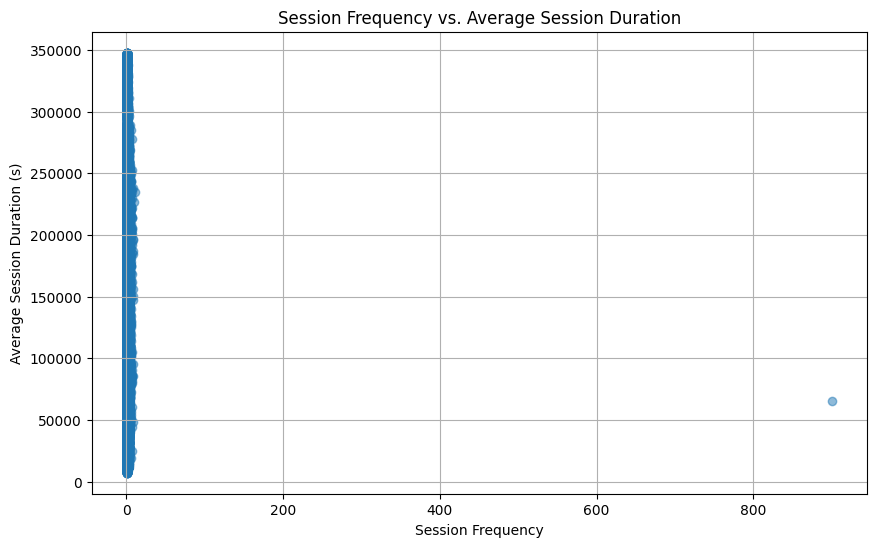

In [66]:
# Calculate average session duration
user_engagement['Average Session Duration (s)'] = user_engagement['Total Session Duration (s)'] / user_engagement['Session Frequency']

# Analyze or visualize the data
import matplotlib.pyplot as plt

# Plot session frequency vs. average session duration
plt.figure(figsize=(10, 6))
plt.scatter(user_engagement['Session Frequency'], user_engagement['Average Session Duration (s)'], alpha=0.5)
plt.title('Session Frequency vs. Average Session Duration')
plt.xlabel('Session Frequency')
plt.ylabel('Average Session Duration (s)')
plt.grid(True)
plt.show()
